*First compiled on July 17th, 2017.*

# Graph abstraction for 3k PBMC cells

This starts with the preprocessing as obtained by running [this preprocessing notebook](https://github.com/theislab/scanpy_usage/blob/master/170505_seurat/seurat.ipynb) in Scanpy. It is based on Seurat's tutorial available from http://satijalab.org/seurat/pbmc-tutorial.html, as compiled on March 30, 2017. The data consists in *3k PBMCs from a Healthy Donor* and is freely available from 10x ([here](https://support.10xgenomics.com/single-cell/datasets/pbmc3k), section *Chromium Demonstration (v1 Chemistry)* in [datasets](https://support.10xgenomics.com/single-cell/datasets)).

In [3]:
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 2                # verbosity: 0=errors, 1=warnings, 2=info, 3=hints, ...
sc.settings.set_dpi(70)                  # dots (pixels) per inch determine size of inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+21.g7c3f248.dirty on 2017-10-05 00:50.


This uses data produced in this [notebook](https://github.com/theislab/scanpy_usage/tree/master/170505_seurat).

In [2]:
adata = sc.read('pbmc3k_corrected')

reading file ./write/pbmc3k_corrected.h5


Plot the data with tSNE. Coloring according to clustering.

In [6]:
sc.tl.tsne(adata, n_pcs=10)
sc.write('pbmc3k_corrected', adata)

computing tSNE
    using X_pca for tSNE
    using 10 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:06.323) and added
    "X_tsne", tSNE coordinates (adata.smp)


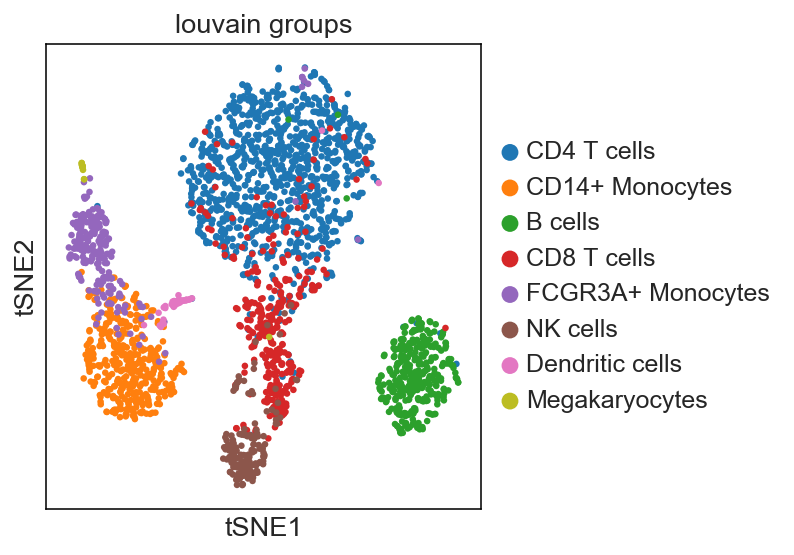

In [7]:
axs = sc.pl.tsne(adata, color='louvain_groups')

In [4]:
sc.tl.aga(adata, node_groups='louvain_groups')
sc.write('pbmc3k_corrected', adata)

running Approximate Graph Abstraction (AGA)
    no root cell found, no computation of pseudotime
--> To enable computation of pseudotime, pass the index or expression vector
    of a root cell. Either add
        adata.add['iroot'] = root_cell_index
    or (robust to subsampling)
        adata.var['xroot'] = adata.X[root_cell_index, :]
    where "root_cell_index" is the integer index of the root cell, or
        adata.var['xroot'] = adata[root_cell_name, :].X
    where "root_cell_name" is the name (a string) of the root cell.
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9873794913  0.9783265591  0.9244093895  0.8772134781
      0.836044848   0.8274152279  0.7253251076  0.6191827059  0.6110315323]
    abstracted graph will have 8 nodes
... finished (0:00:02.500) --> added
    aga_adjacency_full_attachedness : np.ndarray in

reading ./write/pbmc3k_corrected.h5
saving figure to file ./figures/aga_pbmc3k.png


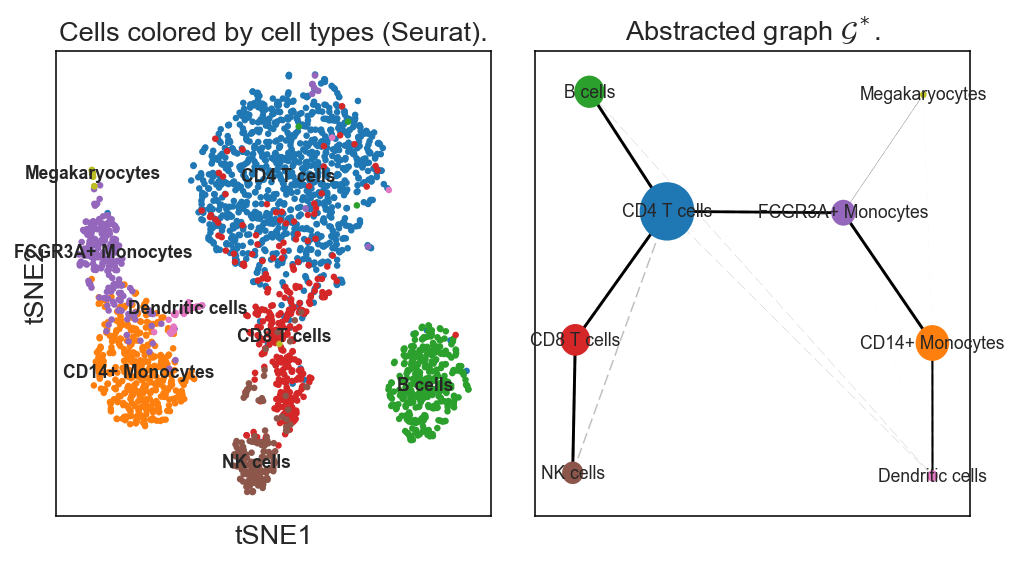

In [5]:
adata = sc.read('pbmc3k_corrected')
axs = sc.pl.aga(adata, title='Cells colored by cell types (Seurat).', 
          title_graph='Abstracted graph $\mathcal{G}^*$.',
          legend_fontsize=9, legend_fontweight='bold', fontsize=9,
          save='_pbmc3k')